In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, LeaveOneOut, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings("ignore")

# Data Analysis

In [2]:
df = pd.read_excel('new Churn.xlsx')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6607,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,1,2,25.30,2153,1
1,2598,0,0,0,0,7,1,0,1,0,...,2,0,0,0,0,1,2,75.15,4396,0
2,2345,0,0,0,1,4,1,0,2,1,...,1,1,1,1,0,1,0,20.05,6211,0
3,4093,0,0,0,0,29,1,2,1,0,...,0,0,0,0,0,1,1,76.00,1850,0
4,693,0,0,0,0,3,1,2,1,0,...,0,0,0,0,0,1,1,75.10,2350,1


### Data type of each column

In [3]:
df.dtypes

customerID            int64
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
Churn                 int64
dtype: object

In [4]:
df.drop(['customerID'], axis=1,inplace=True)

### Check for null

In [5]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Remove duplicate records

In [6]:
df.drop_duplicates(inplace=True)

# Statistical details

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,5269.0,0.513570,0.499863,0.00,0.0,1.00,1.0,1.0
SeniorCitizen,5269.0,0.159992,0.366634,0.00,0.0,0.00,0.0,1.0
Partner,5269.0,0.485671,0.499842,0.00,0.0,0.00,1.0,1.0
Dependents,5269.0,0.301006,0.458739,0.00,0.0,0.00,1.0,1.0
tenure,5269.0,32.491365,24.469585,0.00,9.0,29.00,56.0,72.0
PhoneService,5269.0,0.903397,0.295444,0.00,1.0,1.00,1.0,1.0
MultipleLines,5269.0,0.954830,0.949488,0.00,0.0,1.00,2.0,2.0
InternetService,5269.0,0.871133,0.738555,0.00,0.0,1.00,1.0,2.0
OnlineSecurity,5269.0,0.789334,0.859773,0.00,0.0,1.00,2.0,2.0
OnlineBackup,5269.0,0.916493,0.881263,0.00,0.0,1.00,2.0,2.0


### Correlation

<Axes: >

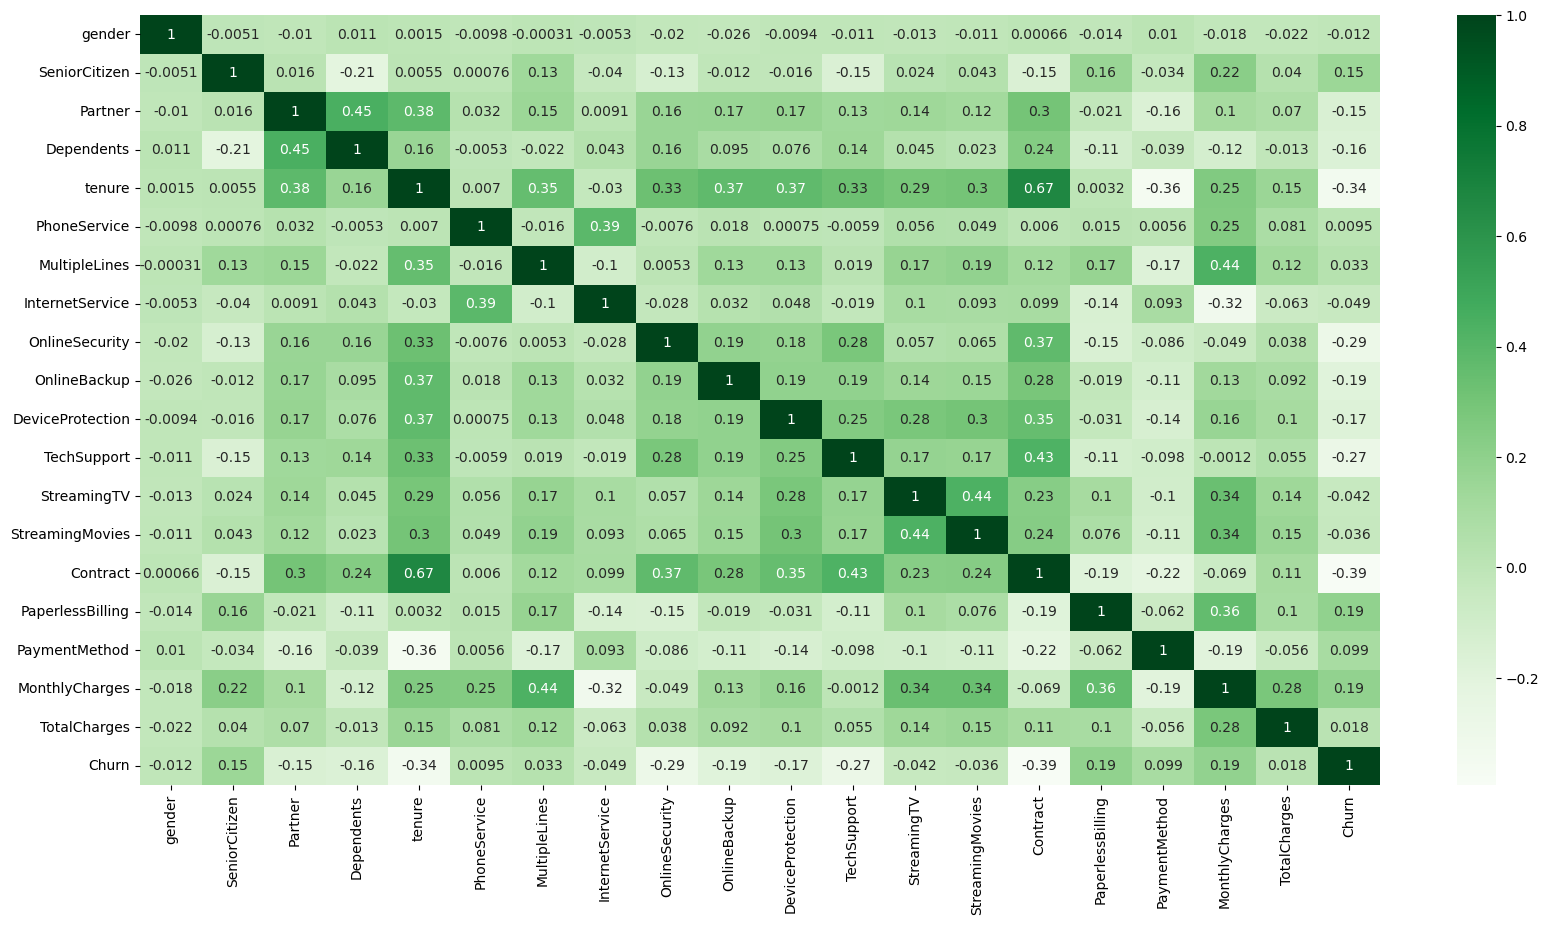

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap="Greens")

# Churn Statistics

In [9]:
df.Churn.value_counts()

Churn
0    3887
1    1382
Name: count, dtype: int64

In [10]:
percentages = df.Churn.value_counts(normalize=True)*100
percentages

Churn
0    73.771114
1    26.228886
Name: proportion, dtype: float64

In [11]:
values = ['Not Churned', 'Churned']
for i in range(len(percentages)):
   print(f"{values[i]}: {percentages[i]:.2f}% of total people")

Not Churned: 73.77% of total people
Churned: 26.23% of total people


<Axes: xlabel='Churn', ylabel='count'>

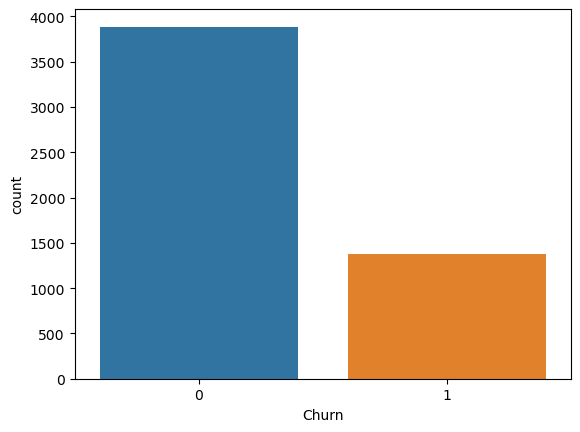

In [12]:
sns.countplot(x='Churn', data=df)

### Features & Target

In [13]:
x = df.drop('Churn',axis=1)
y = df['Churn']

# Resampling

In [14]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler

In [15]:
def printSmapleCount(Data):
    print(pd.concat([
    pd.Series(y.value_counts(), name='before'),
    pd.Series(Data.value_counts(), name='after')],
    axis=1).reset_index())

### Synthetic Minority Oversampling Technique(SMOTE)

In [16]:
sm = SMOTETomek(random_state=44)

In [17]:
x1,y1 = sm.fit_resample(x,y)

In [18]:
printSmapleCount(y1)

   Churn  before  after
0      0    3887   3592
1      1    1382   3592


### Under sampling (Near Miss)

In [19]:
nm = NearMiss()

In [20]:
x2,y2 = nm.fit_resample(x,y)

In [21]:
printSmapleCount(y2)

   Churn  before  after
0      0    3887   1382
1      1    1382   1382


### Over Sampling

In [22]:
over = RandomOverSampler(random_state=44)

In [23]:
x3,y3 = over.fit_resample(x,y)

In [24]:
printSmapleCount(y3)

   Churn  before  after
0      0    3887   3887
1      1    1382   3887


# K-nearest neighbors (KNN)

## Before resampling

In [25]:
xtrain, xtest, ytrain, ytest = tts(x, y, test_size=0.3, random_state=38)

In [26]:
knn1 = KNeighborsClassifier(n_neighbors=12)
knn1.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=12)

In [27]:
knn1.score(xtest,ytest)

0.7900063251106895

## After resampling

In [28]:
# x1, y1 // SMOTE
# (92,5): 0.8051948051948052
# x2, y2 // Under sampling
# (86,14): 0.6180722891566265
# x3, y3 // Over sampling
# (55,5): 0.7483926275182169

In [29]:
xtrain1, xtest1, ytrain1, ytest1 = tts(x1, y1, test_size=0.3, random_state=92)
# SMOTE: (92) 0.8051
# Under-sampling: (25) 0.6
# Over-sampling: (55) 0.7483

### Hyperparameter Tuning

In [30]:
gs = GridSearchCV(KNeighborsClassifier(), {
    'n_neighbors' : range(3,14),
    'weights' : ['uniform','distance'],
    'metric' : ['minkowski','euclidean','manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}, cv=5, n_jobs=-1, verbose=1)

g_res = gs.fit(xtrain1, ytrain1)
g_res.best_score_

Fitting 5 folds for each of 264 candidates, totalling 1320 fits


0.8164270100788305

In [31]:
g_res.best_params_

{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': 4,
 'weights': 'distance'}

In [32]:
knn2 = KNeighborsClassifier(n_neighbors=4, weights='distance', metric='manhattan')
knn2.fit(xtrain1, ytrain1)

KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')

In [33]:
pred = knn2.predict(xtest1)

In [34]:
knn2.score(xtest1,ytest1)

0.8404452690166976

### Classification report

In [35]:
print(classification_report(ytest1, pred))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1057
           1       0.79      0.93      0.86      1099

    accuracy                           0.84      2156
   macro avg       0.85      0.84      0.84      2156
weighted avg       0.85      0.84      0.84      2156



# Cross Validation

### K-Fold Cross Validation

In [36]:
kf_res = cross_val_score(knn2, x1, y1, cv=KFold())

In [37]:
print(f"Min score: {kf_res.min()}")
print(f"Max score: {kf_res.max()}")
print(f"Mean score: {kf_res.mean()}")

Min score: 0.7633959638135004
Max score: 0.9233983286908078
Mean score: 0.8254590672691288


### Stratified K Fold Cross Validation

In [38]:
skf_res = cross_val_score(knn2, x1, y1, cv=StratifiedKFold())

In [39]:
print(f"Min score: {skf_res.min()}")
print(f"Max score: {skf_res.max()}")
print(f"Mean score: {skf_res.mean()}")

Min score: 0.8176757132915797
Max score: 0.8558495821727019
Mean score: 0.8424294849801214


### Leave One-Out Cross Validation (LOOCV)

In [40]:
lout_res = cross_val_score(knn2, x1, y1, cv=LeaveOneOut())

In [41]:
print(f"Min score: {lout_res.min()}")
print(f"Max score: {lout_res.max()}")
print(f"Mean score: {lout_res.mean()}")

Min score: 0.0
Max score: 1.0
Mean score: 0.8543986636971047
